In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
titanic = pd.read_csv('datasets/TITANIC_FORMATTED.csv')

In [3]:
titanic.head()

,Name,Age,Gender,Class,Fare,Survival
0,"Allen, Miss. Elisabeth Walton",29.0,Female,1st,211.34,Survived
1,"Allison, Master. Hudson Trevor",1.0,Male,1st,151.55,Survived
2,"Allison, Miss. Helen Loraine",2.0,Female,1st,151.55,Died
3,"Allison, Mr. Hudson Joshua Creighton",30.0,Male,1st,151.55,Died
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,Female,1st,151.55,Died


In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [5]:
titanic.dtypes

Name         object
Age         float64
Gender       object
Class        object
Fare        float64
Survival     object
dtype: object

In [6]:
titanic['Gender'] = enc.fit(titanic['Gender']).transform(titanic['Gender'])
titanic['Class'] = enc.fit(titanic['Class']).transform(titanic['Class'])
titanic['Survival'] = enc.fit(titanic['Survival']).transform(titanic['Survival'])

In [7]:
titanic.dtypes

Name         object
Age         float64
Gender        int64
Class         int64
Fare        float64
Survival      int64
dtype: object

In [28]:
titanic.isna().sum()

Name        0
Age         0
Gender      0
Class       0
Fare        0
Survival    0
dtype: int64

In [30]:
titanic.shape

(1045, 6)

In [27]:
titanic.dropna(inplace=True)

In [38]:
x_vars = ['Age','Gender','Class','Fare']
y_var = ['Survival']
X=titanic[x_vars]
y=titanic[y_var]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
# modeling using scikit learn
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

In [50]:
prob = model.predict_proba(X_test)

In [51]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [52]:
prob

array([[0.1294549 , 0.8705451 ],
       [0.48588278, 0.51411722],
       [0.90117094, 0.09882906],
       [0.90962134, 0.09037866],
       [0.57068866, 0.42931134],
       [0.83968632, 0.16031368],
       [0.80040086, 0.19959914],
       [0.86023902, 0.13976098],
       [0.29941316, 0.70058684],
       [0.91724786, 0.08275214],
       [0.89518646, 0.10481354],
       [0.23571799, 0.76428201],
       [0.71733722, 0.28266278],
       [0.3969769 , 0.6030231 ],
       [0.88891733, 0.11108267],
       [0.20013857, 0.79986143],
       [0.89190164, 0.10809836],
       [0.93305447, 0.06694553],
       [0.53422045, 0.46577955],
       [0.95371893, 0.04628107],
       [0.07500571, 0.92499429],
       [0.13170138, 0.86829862],
       [0.17830973, 0.82169027],
       [0.15530357, 0.84469643],
       [0.42775043, 0.57224957],
       [0.25646616, 0.74353384],
       [0.22418888, 0.77581112],
       [0.0910829 , 0.9089171 ],
       [0.88568167, 0.11431833],
       [0.8337631 , 0.1662369 ],
       [0.

In [53]:
#titanic['Probabilities'] = prob.tolist()
titanic_1 = pd.concat([titanic,pd.DataFrame(prob)], axis=1)

In [54]:
titanic_1.head()

,Name,Age,Gender,Class,Fare,Survival,0,1
0,"Allen, Miss. Elisabeth Walton",29.0,0.0,0.0,211.34,1.0,0.129455,0.870545
1,"Allison, Master. Hudson Trevor",1.0,1.0,0.0,151.55,1.0,0.485883,0.514117
2,"Allison, Miss. Helen Loraine",2.0,0.0,0.0,151.55,0.0,0.901171,0.098829
3,"Allison, Mr. Hudson Joshua Creighton",30.0,1.0,0.0,151.55,0.0,0.909621,0.090379
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,0.0,0.0,151.55,0.0,0.570689,0.429311


In [62]:
titanic_1.rename(columns={0:'Predicted Y',1:'Probabilities'}, inplace=True)

In [64]:
titanic_1.head()

,Name,Age,Gender,Class,Fare,Survival,Predicted Y,Probabilities
0,"Allen, Miss. Elisabeth Walton",29.0,0.0,0.0,211.34,1.0,0.129455,0.870545
1,"Allison, Master. Hudson Trevor",1.0,1.0,0.0,151.55,1.0,0.485883,0.514117
2,"Allison, Miss. Helen Loraine",2.0,0.0,0.0,151.55,0.0,0.901171,0.098829
3,"Allison, Mr. Hudson Joshua Creighton",30.0,1.0,0.0,151.55,0.0,0.909621,0.090379
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,0.0,0.0,151.55,0.0,0.570689,0.429311


In [66]:
# evaluating our logistic model
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[161  22]
 [ 40  91]]


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       183
           1       0.81      0.69      0.75       131

    accuracy                           0.80       314
   macro avg       0.80      0.79      0.79       314
weighted avg       0.80      0.80      0.80       314



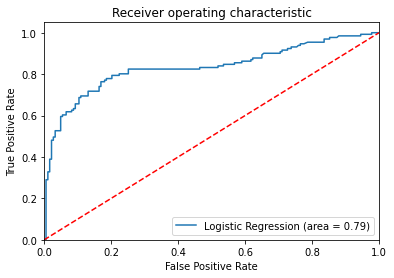

In [68]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [33]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [36]:
# modeling using statmodels
log_reg = sm.Logit(y,X)
result=log_reg.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.521535
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.229     
Dependent Variable: Survival         AIC:              1098.0072 
Date:               2022-04-22 08:33 BIC:              1117.8143 
No. Observations:   1045             Log-Likelihood:   -545.00   
Df Model:           3                LL-Null:          -706.79   
Df Residuals:       1041             LLR p-value:      7.8953e-70
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Age       0.0111     0.0041     2.7284   0.0064    0.0031    0.0191
Gender   -1.9971     0.1510   -13.2256   0.0000   -2.2930 